__Import necessary libraries__

In [29]:
from itertools import combinations
import random as rand
import numpy as np 
import matplotlib.pyplot as plt

Implementation of an unidirected graph using Adjacency Matrix with unweighted edges


In [30]:
# implementation of an unidirected graph using Adjacency Matrix with unweighted edges

class Vertex:
  def __init__(self, n):
    self.name = n

class Graph:

  def __init__(self):
    self.adj_matrix  = []
    self.vertices = {}
    self.vertex_indices = {}

  def add_vertex(self, vertex): # Task A 
    if isinstance(vertex, Vertex) and vertex.name not in self.vertices:
      self.vertices[vertex.name] = vertex
      for row in self.adj_matrix:
        row.append(0)
      self.adj_matrix.append([0] * (len(self.adj_matrix)+1))
      self.vertex_indices[vertex.name] = len(self.vertex_indices)
      return True
    else:
      return False

  def add_edge(self, u, v, weight=1): # Task B 
    if u in self.vertices and v in self.vertices:
      self.adj_matrix[self.vertex_indices[u]][self.vertex_indices[v]] = weight
      self.adj_matrix[self.vertex_indices[v]][self.vertex_indices[u]] = weight
      return True
    else:
      return False

  
  def random_graph(self, n=5, p=0.4): # Task C 
  
    V = set([v for v in range(n)])
    E = set()

    for combination in combinations(V, 2):
      a = rand.random()
      if a < p:
          E.add(combination)

    for i in V:
      self.add_vertex(Vertex(i))

    for edge in E:
      self.add_edge(edge[0], edge[1])

  def adj_matrix_to_graph(self): # Task D 
      num_vertices = len(self.vertices)
      num_edges = len([(i,j) for i,l in enumerate(g.adj_matrix) for j,v in enumerate(l) if v])//2
      fig = plt.figure()
      ax = fig.add_subplot(111)
      xlim = [-1.1, 1.1]
      ylim = [-1.1, 1.1]
      ax.set(xlim=xlim, ylim=ylim)  # coordinate system 

      theta = 2 * np.pi / num_vertices # unit circle or 360 deg divided by number of points 
      x = []
      y = []
      for i in range(num_vertices):
          x.append(np.cos(i * theta)) # place a point 
          y.append(np.sin(i * theta))  

      ax.scatter(x, y, color='r', s=200)

      for i, key in zip(range(num_vertices), self.vertices.keys()):
          ax.annotate(key, (x[i], y[i]), color='b', ha="center", va="center")  #Draw points and marked

      for i in range(num_vertices):
          for j in range(num_vertices):
              if self.adj_matrix[i][j]:  # if nodes i and j are connected 
                  x_temp = [x[i], x[j]]
                  y_temp = [y[i], y[j]]
                  ax.plot(x_temp, y_temp, linewidth=0.5, color='red')

      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_title(f" Random Graph with {num_vertices} nodes and {num_edges} edges")
      plt.show()

  def guest_lister(self, input):
    edges = [(i,j) for i,l in enumerate(self.adj_matrix) for j,v in enumerate(l) if v]
    sets = set()
    guest_list = {}
    for comb in combinations(input, 2): 
      sets.add(comb[0])
      sets.add(comb[1])

    for i in sets:
      guest_list[i] = []
      for k in sets:
        if (i,k) not in edges and i!=k:
          guest_list[i].append(k)
        
    # sort according to number of potential friends
    return dict(sorted(guest_list.items(), key=lambda e: (len(e[1])), reverse = True))

  def invitation_list(self):
    input = self.guest_lister(self.vertices.keys())
    invitation_set = set()

    while(len(input)>0):
      invitation_set.add(list(input.keys())[0])
      if len(input[list(input.keys())[0]]) == 1:
        invitation_set.add(list(input.keys())[0])
        invitation_set.add(input[list(input.keys())[0]][0])
      input = self.guest_lister(input[list(input.keys())[0]])

    print("Max guests list: ", invitation_set) 


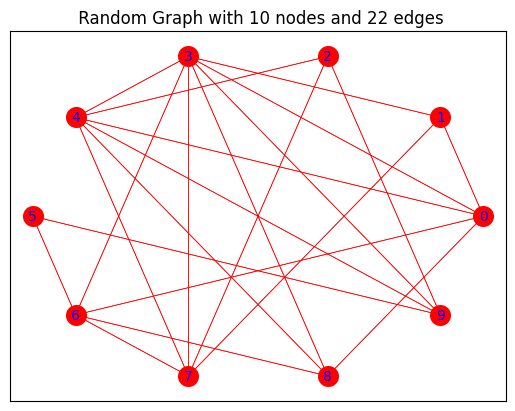

Max guests list:  {8, 1, 2, 5}


In [31]:
g = Graph()
g.random_graph(n=10, p=0.4)
g.adj_matrix_to_graph()
g.invitation_list()

Example 1


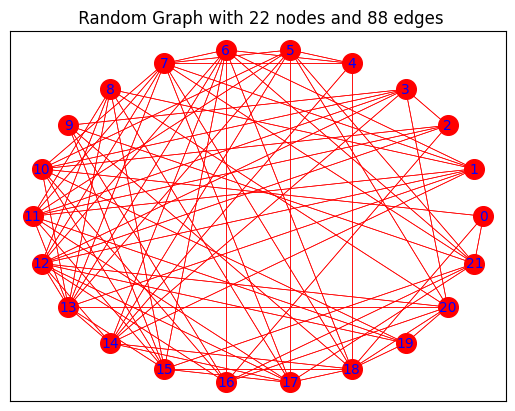

Max guests list:  {0, 2, 5, 6, 8, 9, 19}
--------------------------------------------------------------------
 
Example 2


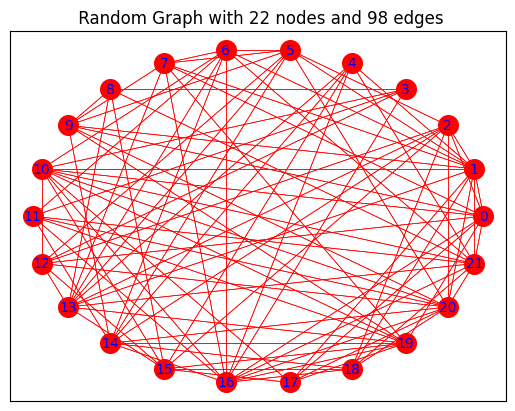

Max guests list:  {3, 4, 6, 9, 17, 18}
--------------------------------------------------------------------
 
Example 3


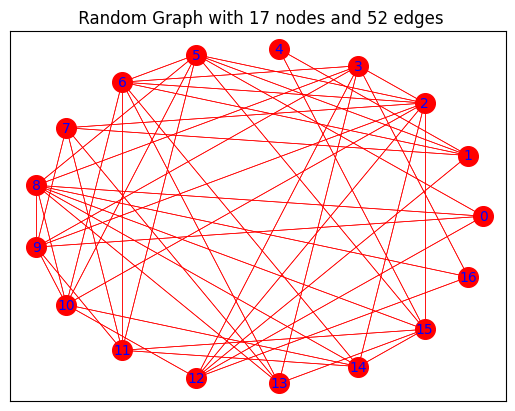

Max guests list:  {0, 2, 4, 11, 13, 16}
--------------------------------------------------------------------
 
Example 4


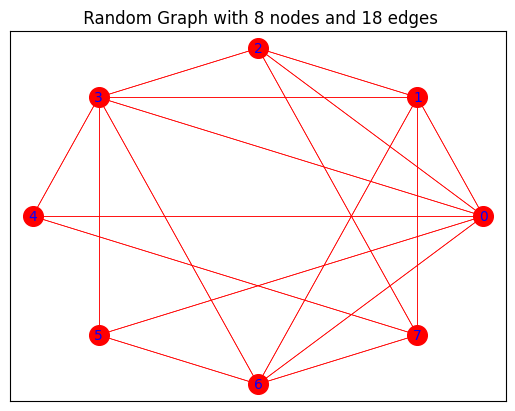

Max guests list:  {2, 4, 5}
--------------------------------------------------------------------
 
Example 5


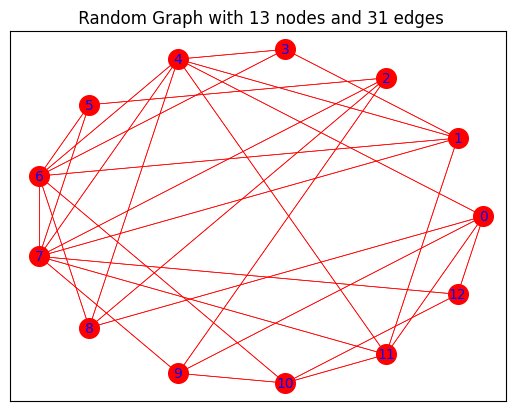

Max guests list:  {3, 5, 8, 9, 11, 12}
--------------------------------------------------------------------
 
Example 6


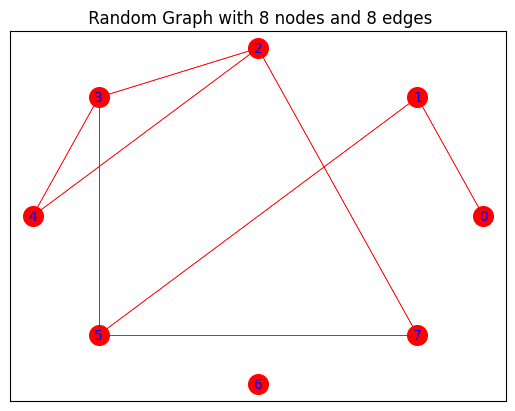

Max guests list:  {0, 4, 5, 6}
--------------------------------------------------------------------
 
Example 7


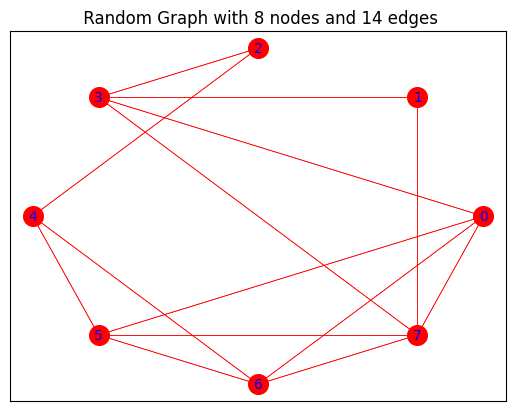

Max guests list:  {0, 1, 2}
--------------------------------------------------------------------
 
Example 8


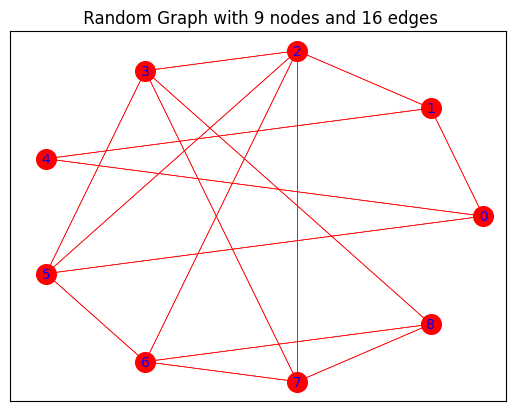

Max guests list:  {8, 4, 5}
--------------------------------------------------------------------
 
Example 9


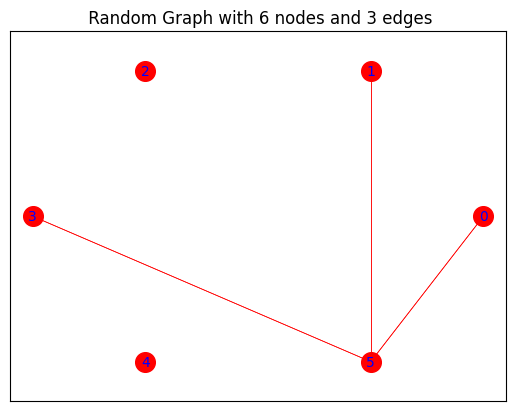

Max guests list:  {0, 1, 2, 3, 4}
--------------------------------------------------------------------
 
Example 10


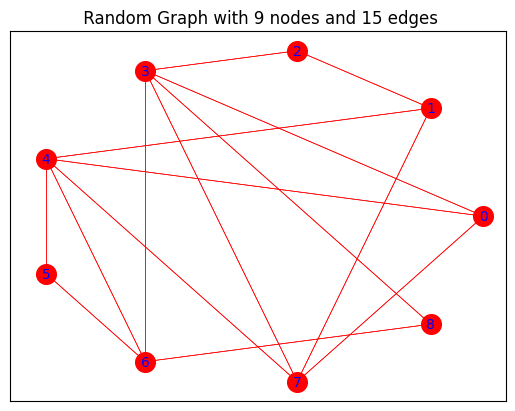

Max guests list:  {8, 0, 2, 5}
--------------------------------------------------------------------
 


In [32]:
for i in range(10):
  n = rand.randint(5, 25)
  g = Graph()
  print(f"Example {i+1}")
  g.random_graph(n=n, p=0.4)
  g.adj_matrix_to_graph()
  g.invitation_list()
  print("----"*17)
  print(" ")